In [1]:
import pandas as pd

In [2]:
df_title = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [3]:
df_title = df_title[['title', 'id']]

In [4]:
df_title = df_title.drop_duplicates()

In [5]:
df_rating = pd.read_csv('data/ratings_small.csv')

In [6]:
df_rating = df_rating.iloc[ : , :2+1]

In [7]:
df_title = df_title.rename(columns={'id':'movieId'})

In [8]:
df_title = df_title.dropna()

In [9]:
df_title['movieId'] = df_title['movieId'].astype(int)

In [10]:
df = pd.merge(df_title, df_rating, on='movieId')

In [11]:
df['userId'].nunique()

671

In [12]:
df['movieId'].nunique()

2830

In [13]:
df

,title,movieId,userId,rating
0,Heat,949,23,3.5
1,Heat,949,102,4.0
2,Heat,949,232,2.0
3,Heat,949,242,5.0
4,Heat,949,263,3.0
...,...,...,...,...
44984,Travelling with Pets,64197,73,4.0
44985,Travelling with Pets,64197,544,5.0
44986,Travelling with Pets,64197,648,3.5
44987,Cinderella,98604,352,4.0


<AxesSubplot:>

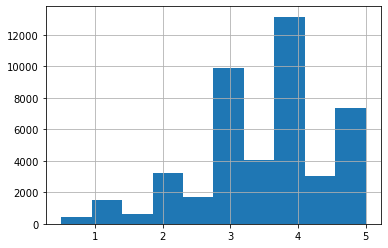

In [14]:
df['rating'].hist()

In [15]:
df.isnull().sum()

title      0
movieId    0
userId     0
rating     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44989 entries, 0 to 44988
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    44989 non-null  object 
 1   movieId  44989 non-null  int32  
 2   userId   44989 non-null  int64  
 3   rating   44989 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 1.5+ MB


In [17]:
df

,title,movieId,userId,rating
0,Heat,949,23,3.5
1,Heat,949,102,4.0
2,Heat,949,232,2.0
3,Heat,949,242,5.0
4,Heat,949,263,3.0
...,...,...,...,...
44984,Travelling with Pets,64197,73,4.0
44985,Travelling with Pets,64197,544,5.0
44986,Travelling with Pets,64197,648,3.5
44987,Cinderella,98604,352,4.0


In [18]:
df_count = df.groupby('movieId')['rating'].count()

In [19]:
df_count.describe()

count    2830.000000
mean       15.897173
std        30.959460
min         1.000000
25%         1.000000
50%         4.000000
75%        15.000000
max       324.000000
Name: rating, dtype: float64

In [20]:
df_count.to_frame()

,rating
movieId,
2,107
3,59
5,56
6,104
11,82
...,...
140174,5
142507,1
148652,1


In [21]:
df_ratcnt = df.groupby('title')['rating'].count()

In [22]:
df_ratcnt = df_ratcnt.to_frame()

In [23]:
df_ratcnt

,rating
title,
!Women Art Revolution,2
'Gator Bait,1
'Twas the Night Before Christmas,2
...And God Created Woman,1
00 Schneider - Jagd auf Nihil Baxter,2
...,...
xXx,28
¡Three Amigos!,1
À nos amours,14


In [24]:
df_ratcnt = df_ratcnt.loc[ df_ratcnt['rating'] >= 10 , ]

In [25]:
df_ratcnt

,rating
title,
10 Items or Less,11
2 Days in Paris,12
"20,000 Leagues Under the Sea",89
2001: A Space Odyssey,87
24 Hour Party People,22
...,...
Zatoichi,61
Zodiac,10
eXistenZ,12


In [26]:
df_titleindex = df_title.set_index('title')

In [27]:
df_join = df_titleindex.join(df_ratcnt)

In [28]:
df_join

,movieId,rating
title,,
!Women Art Revolution,55245,NaN
#1 Cheerleader Camp,41371,NaN
#Horror,301325,NaN
#chicagoGirl,267752,NaN
"$1,000 on the Black",143747,NaN
...,...,...
هیچ کجا هیچ کس,388182,NaN
‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen,120249,NaN
’Round Midnight,14670,NaN


In [29]:
df_title = df_join.dropna()

In [30]:
df_title = df_title['movieId'].to_frame()

In [31]:
df_title = df_title.reset_index()

In [32]:
df_title

,title,movieId
0,10 Items or Less,2357
1,2 Days in Paris,1845
2,"20,000 Leagues Under the Sea",173
3,"20,000 Leagues Under the Sea",30266
4,"20,000 Leagues Under the Sea",2966
...,...,...
1130,Zodiac,1949
1131,Zodiac,285135
1132,eXistenZ,1946
1133,xXx,7451


In [33]:
df = pd.merge(df_title, df_rating, on='movieId')

In [34]:
df = df.loc[ : , ['title', 'userId', 'rating'] ]

In [35]:
df

,title,userId,rating
0,10 Items or Less,15,3.0
1,10 Items or Less,23,4.0
2,10 Items or Less,131,4.0
3,10 Items or Less,132,4.5
4,10 Items or Less,283,5.0
...,...,...,...
39660,À nos amours,489,3.0
39661,À nos amours,528,3.0
39662,À nos amours,564,3.0
39663,À nos amours,608,4.0


In [36]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title')

In [37]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_pivot['À nos amours']

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
667   NaN
668   NaN
669   NaN
670   NaN
671   NaN
Name: À nos amours, Length: 671, dtype: float64

In [39]:
df_pivot.corrwith(df_pivot['À nos amours'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
10 Items or Less                     NaN
2 Days in Paris                 0.102062
20,000 Leagues Under the Sea   -0.436436
2001: A Space Odyssey           0.310439
24 Hour Party People            0.912871
                                  ...   
Zatoichi                             NaN
Zodiac                               NaN
eXistenZ                       -0.500000
xXx                                  NaN
À nos amours                    1.000000
Length: 944, dtype: float64

In [40]:
df_pivot.loc[4 , ]

title
10 Items or Less                NaN
2 Days in Paris                 NaN
20,000 Leagues Under the Sea    3.0
2001: A Space Odyssey           NaN
24 Hour Party People            NaN
                               ... 
Zatoichi                        NaN
Zodiac                          NaN
eXistenZ                        NaN
xXx                             NaN
À nos amours                    NaN
Name: 4, Length: 944, dtype: float64

In [41]:
df_pivot.corrwith(df_pivot.loc[4 , ])

title
10 Items or Less               NaN
2 Days in Paris                NaN
20,000 Leagues Under the Sea   NaN
2001: A Space Odyssey          NaN
24 Hour Party People           NaN
                                ..
Zatoichi                       NaN
Zodiac                         NaN
eXistenZ                       NaN
xXx                            NaN
À nos amours                   NaN
Length: 944, dtype: float64

In [42]:
##############=============

In [43]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_pivot.append({'10 Items or Less' : 3}, ignore_index=True)

,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [45]:
# df_pivot.append({'2 Days in Paris' : 4}, index= 670)

In [46]:
# df_pivot.loc[ , '10 Items or Less' ] = 3

In [47]:
# df_pivot.loc[999] = {'20,000 Leagues Under the Sea' : 3}

In [48]:
# df_pivot

In [49]:
# df_pivot.append({'20,000 Leagues Under the Sea' : 3},ignore_index= 999)

In [50]:
# df_pivot = df_pivot.append({'20,000 Leagues Under the Sea' : 3},ignore_index= True)

In [51]:
# df_pivot.append({'10 Items or Less' : 3},ignore_index= True)

In [52]:
# df = ["À nos amours", 2282, 999, 5]

In [53]:
# df

In [54]:
df = df.append( {'title' : 'À nos amours' , 'userId' : 999, 'rating' : 5}, ignore_index=True )

In [55]:
df

,title,userId,rating
0,10 Items or Less,15,3.0
1,10 Items or Less,23,4.0
2,10 Items or Less,131,4.0
3,10 Items or Less,132,4.5
4,10 Items or Less,283,5.0
...,...,...,...
39661,À nos amours,528,3.0
39662,À nos amours,564,3.0
39663,À nos amours,608,4.0
39664,À nos amours,665,1.0


In [56]:
sem = list(df.columns)

In [57]:
list(enumerate(sem))

[(0, 'title'), (1, 'userId'), (2, 'rating')]

In [58]:
sem.index('title')

0

In [59]:
df_pivot.columns

Index(['10 Items or Less', '2 Days in Paris', '20,000 Leagues Under the Sea',
       '2001: A Space Odyssey', '24 Hour Party People', '25th Hour',
       '28 Days Later', '28 Weeks Later', '3-Iron', '300',
       ...
       'Yella', 'Yesterday', 'Young Adam', 'Young Frankenstein',
       'Young and Innocent', 'Zatoichi', 'Zodiac', 'eXistenZ', 'xXx',
       'À nos amours'],
      dtype='object', name='title', length=944)

In [60]:
df_pivot.to_csv('df_pivot.csv')

In [61]:
df.to_csv('df.csv')

In [62]:
col_list = list(df_pivot.columns)

In [63]:
col_list.index('10 Items or Less')

0

In [64]:
list(enumerate(col_list))

[(0, '10 Items or Less'),
 (1, '2 Days in Paris'),
 (2, '20,000 Leagues Under the Sea'),
 (3, '2001: A Space Odyssey'),
 (4, '24 Hour Party People'),
 (5, '25th Hour'),
 (6, '28 Days Later'),
 (7, '28 Weeks Later'),
 (8, '3-Iron'),
 (9, '300'),
 (10, '4 Months, 3 Weeks and 2 Days'),
 (11, '42nd Street'),
 (12, '48 Hrs.'),
 (13, '5 Card Stud'),
 (14, '7 Virgins'),
 (15, '8 Mile'),
 (16, '8 Women'),
 (17, '88 Minutes'),
 (18, 'A Bridge Too Far'),
 (19, 'A Brief History of Time'),
 (20, 'A Clockwork Orange'),
 (21, 'A Close Shave'),
 (22, 'A Friend of Mine'),
 (23, 'A Good Marriage'),
 (24, 'A Kiss Before Dying'),
 (25, 'A Nightmare on Elm Street'),
 (26, 'A Perfect Murder'),
 (27, 'A River Runs Through It'),
 (28, 'A Shot in the Dark'),
 (29, 'A Tale of Two Cities'),
 (30, 'A Taxing Woman'),
 (31, 'A Time to Kill'),
 (32, 'A Very Long Engagement'),
 (33, 'A View to a Kill'),
 (34, 'A Woman, a Gun and a Noodle Shop'),
 (35, 'Abraham'),
 (36, 'Aces Go Places V: The Terracotta Hit'),
 (37, 

In [65]:
a = '1'

In [66]:
a

'1'

In [67]:
float(a)

1.0

In [68]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.describe()

,userId,rating
count,39666.000000,39666.000000
mean,342.758181,3.600187
std,194.957459,1.036919
min,1.000000,0.500000
25%,174.000000,3.000000
50%,355.000000,4.000000
75%,517.000000,4.000000
max,999.000000,5.000000


In [70]:
df = df.append( {'title' : 'À nos amours' , 'userId' : 999, 'rating' : 5}, ignore_index=True )

In [71]:
df

,title,userId,rating
0,10 Items or Less,15,3.0
1,10 Items or Less,23,4.0
2,10 Items or Less,131,4.0
3,10 Items or Less,132,4.5
4,10 Items or Less,283,5.0
...,...,...,...
39662,À nos amours,564,3.0
39663,À nos amours,608,4.0
39664,À nos amours,665,1.0
39665,À nos amours,999,5.0


In [72]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title')

In [73]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
list( (df.loc[ df['userId'] == 999 , ])['userId'] == 999 )[1]

True

In [76]:
df['userId'] == 999

0        False
1        False
2        False
3        False
4        False
         ...  
39662    False
39663    False
39664    False
39665    False
39666    False
Name: userId, Length: 39667, dtype: bool

In [108]:
df2 = pd.read_csv('data/df2.csv')

In [109]:
df2

,Unnamed: 0,Unnamed: 0.1,title,userId,rating
0,0,0,10 Items or Less,15,3.0
1,1,1,10 Items or Less,23,4.0
2,2,2,10 Items or Less,131,4.0
3,3,3,10 Items or Less,132,4.5
4,4,4,10 Items or Less,283,5.0
...,...,...,...,...,...
39660,39660,39660,À nos amours,489,3.0
39661,39661,39661,À nos amours,528,3.0
39662,39662,39662,À nos amours,564,3.0
39663,39663,39663,À nos amours,608,4.0


In [93]:
list( (df2.loc[ df['userId'] == 999 , ])['userId'] != 999 )[0]

False

In [94]:
list( (df2.loc[ df['userId'] == 999 , ])['userId'] == 999 )[0]

True

In [102]:
( ( (df2.loc[ df['userId'] == 999 , ])['userId'] != 999).tolist() )[0]

False

In [96]:
list( (df2.loc[ df['userId'] == 999 , ])['userId'] != 999 )

[False]

In [105]:
df2.loc[ df2['userId'] == 999 , ]

,Unnamed: 0,Unnamed: 0.1,title,userId,rating
39665,39665,NaN,10 Items or Less,999,1.0


In [112]:
df

,title,userId,rating
0,10 Items or Less,15,3.0
1,10 Items or Less,23,4.0
2,10 Items or Less,131,4.0
3,10 Items or Less,132,4.5
4,10 Items or Less,283,5.0
...,...,...,...
39662,À nos amours,564,3.0
39663,À nos amours,608,4.0
39664,À nos amours,665,1.0
39665,À nos amours,999,5.0


In [120]:
(df2.loc[ df2['userId'] != 999 , ])['userId'] == 999

0        False
1        False
2        False
3        False
4        False
         ...  
39660    False
39661    False
39662    False
39663    False
39664    False
Name: userId, Length: 39665, dtype: bool

In [121]:
( ( (df2.loc[ df2['userId'] != 999 , ])['userId'] == 999).tolist() )[0]

False

In [122]:
df2

,Unnamed: 0,Unnamed: 0.1,title,userId,rating
0,0,0,10 Items or Less,15,3.0
1,1,1,10 Items or Less,23,4.0
2,2,2,10 Items or Less,131,4.0
3,3,3,10 Items or Less,132,4.5
4,4,4,10 Items or Less,283,5.0
...,...,...,...,...,...
39660,39660,39660,À nos amours,489,3.0
39661,39661,39661,À nos amours,528,3.0
39662,39662,39662,À nos amours,564,3.0
39663,39663,39663,À nos amours,608,4.0


In [123]:
df2.iloc[ : , 1: ]

,Unnamed: 0.1,title,userId,rating
0,0,10 Items or Less,15,3.0
1,1,10 Items or Less,23,4.0
2,2,10 Items or Less,131,4.0
3,3,10 Items or Less,132,4.5
4,4,10 Items or Less,283,5.0
...,...,...,...,...
39660,39660,À nos amours,489,3.0
39661,39661,À nos amours,528,3.0
39662,39662,À nos amours,564,3.0
39663,39663,À nos amours,608,4.0


In [127]:
( ( (df2.loc[ df2['userId'] != 999 , ])['userId'] != 999).tolist() )[0]

True

In [132]:
( ( ( (df2.loc[ df2['userId'] != 999 , ])['userId'] == 999).tolist() )[0] ) == False

True

In [165]:
df2 = pd.read_csv('data/df2.csv', usecols= [1, 2, 3])

In [166]:
df2

,title,userId,rating
0,10 Items or Less,15,3.0
1,10 Items or Less,23,4.0
2,10 Items or Less,131,4.0
3,10 Items or Less,132,4.5
4,10 Items or Less,283,5.0
...,...,...,...
39660,À nos amours,489,3.0
39661,À nos amours,528,3.0
39662,À nos amours,564,3.0
39663,À nos amours,608,4.0


In [135]:
( ( ( (df2.loc[ df2['userId'] != 999 , ])['userId'] == 999).tolist() )[0] ) == False

True

In [136]:
( ( (df2.loc[ df2['userId'] == 999 , ])['userId'] == 999).tolist() )[0]

True

In [150]:
( df2.loc[ df2['userId'] == 999 , ]['userId'].tolist() ) == []

True

In [153]:
df2 = df2.iloc[ : , 2:]

In [167]:
df2.to_csv('data/df2.csv')

In [ ]:
# rating, userId 위치 바꾸기

In [197]:
df2 = pd.read_csv('data/df2.csv')

In [200]:
df2

,title,rating,userId
0,10 Items or Less,3.0,15
1,10 Items or Less,4.0,23
2,10 Items or Less,4.0,131
3,10 Items or Less,4.5,132
4,10 Items or Less,5.0,283
...,...,...,...
39662,À nos amours,3.0,564
39663,À nos amours,4.0,608
39664,À nos amours,1.0,665
39665,Jarhead,3.0,999


In [198]:
df2 = df2.loc[ : , ['title', 'rating', 'userId']]

In [199]:
df2.to_csv('data/df2.csv')

In [195]:
df = pd.read_csv('data/df.csv')

In [196]:
df

,Unnamed: 0,title,rating,userId
0,0,10 Items or Less,3.0,15
1,1,10 Items or Less,4.0,23
2,2,10 Items or Less,4.0,131
3,3,10 Items or Less,4.5,132
4,4,10 Items or Less,5.0,283
...,...,...,...,...
39660,39660,À nos amours,3.0,489
39661,39661,À nos amours,3.0,528
39662,39662,À nos amours,3.0,564
39663,39663,À nos amours,4.0,608


In [193]:
df = df.loc[ : , ['title', 'rating', 'userId']]

In [194]:
df.to_csv('data/df.csv')

In [208]:
# df2 를 df_user 로 바꿈
df_user = pd.read_csv('data/df_user.csv', usecols= [1, 2, 3])

In [209]:
df_user

,title,rating,userId
0,10 Items or Less,3.0,15
1,10 Items or Less,4.0,23
2,10 Items or Less,4.0,131
3,10 Items or Less,4.5,132
4,10 Items or Less,5.0,283
...,...,...,...
39661,À nos amours,3.0,528
39662,À nos amours,3.0,564
39663,À nos amours,4.0,608
39664,À nos amours,1.0,665


In [210]:
df_user_pivot = df_user.pivot_table(values='rating', index='userId', columns= 'title')

In [211]:
df_user_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
df3 = df_user_pivot.corrwith(df_user_pivot['10 Items or Less']).to_frame()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [231]:
df3

,0
title,
10 Items or Less,1.000000
2 Days in Paris,NaN
"20,000 Leagues Under the Sea",-0.174078
2001: A Space Odyssey,0.866025
24 Hour Party People,NaN
...,...
Zatoichi,0.174078
Zodiac,NaN
eXistenZ,0.962250


In [224]:
df3.sort_values(0 , ascending=False).describe()

,0
count,471.000000
mean,0.199597
std,0.771245
min,-1.000000
25%,-0.546770
50%,0.500000
75%,0.919119
max,1.000000


In [235]:
df_user_pivot['10 Items or Less']

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
668    NaN
669    NaN
670    NaN
671    NaN
999    5.0
Name: 10 Items or Less, Length: 672, dtype: float64

In [229]:
df_user_pivot.loc[999, ]

title
10 Items or Less                5.0
2 Days in Paris                 NaN
20,000 Leagues Under the Sea    NaN
2001: A Space Odyssey           NaN
24 Hour Party People            NaN
                               ... 
Zatoichi                        NaN
Zodiac                          NaN
eXistenZ                        NaN
xXx                             NaN
À nos amours                    NaN
Name: 999, Length: 944, dtype: float64

In [232]:
df4 = df_user_pivot.corrwith(df_user_pivot.loc[999, ]).to_frame()

In [236]:
df4

,0
title,
10 Items or Less,NaN
2 Days in Paris,NaN
"20,000 Leagues Under the Sea",NaN
2001: A Space Odyssey,NaN
24 Hour Party People,NaN
...,...
Zatoichi,NaN
Zodiac,NaN
eXistenZ,NaN


In [234]:
df4.describe()

,0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [237]:
df_user_pivot2 = df_user.pivot_table(values='rating', index='title', columns= 'userId')

In [238]:
df_user_pivot2

userId,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,999
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2 Days in Paris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea",NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hour Party People,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zatoichi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zodiac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
df_user_pivot2[999]

title
10 Items or Less                5.0
2 Days in Paris                 NaN
20,000 Leagues Under the Sea    NaN
2001: A Space Odyssey           NaN
24 Hour Party People            NaN
                               ... 
Zatoichi                        NaN
Zodiac                          NaN
eXistenZ                        NaN
xXx                             NaN
À nos amours                    NaN
Name: 999, Length: 944, dtype: float64

In [242]:
df4 = df_user_pivot2.corrwith(df_user_pivot2[999]).to_frame()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [245]:
df4

,0
userId,
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
668,NaN
669,NaN
670,NaN


In [251]:
df_user_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df_user_pivot.corr()

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,1.000000,NaN,-1.740777e-01,0.866025,NaN,NaN,NaN,-1.000000,0.720577,8.660254e-01,...,1.000000,1.000000,-0.944911,NaN,0.271448,0.174078,NaN,0.962250,-1.889822e-01,NaN
2 Days in Paris,NaN,1.000000,5.115415e-01,NaN,NaN,NaN,NaN,0.696106,0.333333,NaN,...,1.000000,NaN,NaN,NaN,0.300081,0.333333,NaN,-1.000000,NaN,0.102062
"20,000 Leagues Under the Sea",-0.174078,0.511542,1.000000e+00,-0.589086,-0.336414,0.500000,0.396781,0.142451,-0.046029,-1.748193e-01,...,-0.278989,0.524681,0.076597,0.232737,0.172157,0.435628,0.834622,0.373939,9.383097e-18,-0.436436
2001: A Space Odyssey,0.866025,NaN,-5.890855e-01,1.000000,0.514617,0.395285,-0.307583,0.323571,0.540062,2.859475e-01,...,0.782794,0.531474,0.555993,0.438938,0.175792,-0.116308,0.672329,-0.188982,3.015113e-01,0.310439
24 Hour Party People,NaN,NaN,-3.364141e-01,0.514617,1.000000,NaN,1.000000,0.344952,-0.158777,7.416198e-01,...,0.333849,NaN,0.049029,-0.378835,0.071082,0.471940,0.944911,0.203859,NaN,0.912871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zatoichi,0.174078,0.333333,4.356276e-01,-0.116308,0.471940,NaN,0.126660,-0.213858,-0.649722,3.752534e-01,...,0.494494,-0.260360,0.274010,0.428746,0.071458,1.000000,-0.327327,0.729710,1.230915e-01,NaN
Zodiac,NaN,NaN,8.346223e-01,0.672329,0.944911,NaN,1.000000,0.716847,-1.000000,-5.776713e-02,...,0.866025,-1.000000,0.493742,0.946729,0.030498,-0.327327,1.000000,-1.000000,1.000000e+00,NaN
eXistenZ,0.962250,-1.000000,3.739392e-01,-0.188982,0.203859,NaN,NaN,NaN,-0.327327,5.000000e-01,...,0.489956,1.000000,-0.944911,NaN,-0.553010,0.729710,-1.000000,1.000000,NaN,-0.500000


In [252]:
df_user

,title,rating,userId
0,10 Items or Less,3.0,15
1,10 Items or Less,4.0,23
2,10 Items or Less,4.0,131
3,10 Items or Less,4.5,132
4,10 Items or Less,5.0,283
...,...,...,...
39661,À nos amours,3.0,528
39662,À nos amours,3.0,564
39663,À nos amours,4.0,608
39664,À nos amours,1.0,665


In [254]:
pd.read_csv('data/user_rating.csv')

,title,rating,userId


In [255]:
df

,Unnamed: 0,title,rating,userId
0,0,10 Items or Less,3.0,15
1,1,10 Items or Less,4.0,23
2,2,10 Items or Less,4.0,131
3,3,10 Items or Less,4.5,132
4,4,10 Items or Less,5.0,283
...,...,...,...,...
39660,39660,À nos amours,3.0,489
39661,39661,À nos amours,3.0,528
39662,39662,À nos amours,3.0,564
39663,39663,À nos amours,4.0,608


In [257]:
df_pivot = df.pivot_table(values='rating', index='userId', columns= 'title')

In [258]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
df_pivot['10 Items or Less'].describe()

count    11.000000
mean      4.318182
std       0.643146
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 10 Items or Less, dtype: float64

In [295]:
df_pivot['Gravity'].describe()

count    33.000000
mean      3.727273
std       0.884687
min       1.500000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: Gravity, dtype: float64

In [262]:
user_rating = pd.read_csv('data/user_rating.csv', usecols= [1, 2, 3])

In [263]:
user_rating

,title,rating,userId
0,10 Items or Less,3.0,999
1,2 Days in Paris,5.0,999


In [275]:
df_corr = df_pivot.corr()

In [292]:
df_corr

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,1.000000,NaN,-1.740777e-01,0.866025,NaN,NaN,NaN,-1.000000,0.720577,8.660254e-01,...,1.000000,1.000000,-0.944911,NaN,0.271448,0.174078,NaN,0.962250,-1.889822e-01,NaN
2 Days in Paris,NaN,1.000000,5.115415e-01,NaN,NaN,NaN,NaN,0.696106,0.333333,NaN,...,1.000000,NaN,NaN,NaN,0.300081,0.333333,NaN,-1.000000,NaN,0.102062
"20,000 Leagues Under the Sea",-0.174078,0.511542,1.000000e+00,-0.589086,-0.336414,0.500000,0.396781,0.142451,-0.046029,-1.748193e-01,...,-0.278989,0.524681,0.076597,0.232737,0.172157,0.435628,0.834622,0.373939,9.383097e-18,-0.436436
2001: A Space Odyssey,0.866025,NaN,-5.890855e-01,1.000000,0.514617,0.395285,-0.307583,0.323571,0.540062,2.859475e-01,...,0.782794,0.531474,0.555993,0.438938,0.175792,-0.116308,0.672329,-0.188982,3.015113e-01,0.310439
24 Hour Party People,NaN,NaN,-3.364141e-01,0.514617,1.000000,NaN,1.000000,0.344952,-0.158777,7.416198e-01,...,0.333849,NaN,0.049029,-0.378835,0.071082,0.471940,0.944911,0.203859,NaN,0.912871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zatoichi,0.174078,0.333333,4.356276e-01,-0.116308,0.471940,NaN,0.126660,-0.213858,-0.649722,3.752534e-01,...,0.494494,-0.260360,0.274010,0.428746,0.071458,1.000000,-0.327327,0.729710,1.230915e-01,NaN
Zodiac,NaN,NaN,8.346223e-01,0.672329,0.944911,NaN,1.000000,0.716847,-1.000000,-5.776713e-02,...,0.866025,-1.000000,0.493742,0.946729,0.030498,-0.327327,1.000000,-1.000000,1.000000e+00,NaN
eXistenZ,0.962250,-1.000000,3.739392e-01,-0.188982,0.203859,NaN,NaN,NaN,-0.327327,5.000000e-01,...,0.489956,1.000000,-0.944911,NaN,-0.553010,0.729710,-1.000000,1.000000,NaN,-0.500000


In [296]:
user_rating['title'].values[0]

'10 Items or Less'

In [286]:
df_corr[ user_rating['title'].values[0] ].dropna()

title
10 Items or Less                1.000000
20,000 Leagues Under the Sea   -0.174078
2001: A Space Odyssey           0.866025
28 Weeks Later                 -1.000000
3-Iron                          0.720577
                                  ...   
Young Adam                     -0.944911
Young and Innocent              0.271448
Zatoichi                        0.174078
eXistenZ                        0.962250
xXx                            -0.188982
Name: 10 Items or Less, Length: 471, dtype: float64

In [308]:
df_pivot

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
df_corr[ '2001: A Space Odyssey' ].dropna().sort_values(ascending= False).to_frame()

,2001: A Space Odyssey
title,
Shark!,1.0
Kebab Connection,1.0
Changing Lanes,1.0
What Women Want,1.0
The Mask of Fu Manchu,1.0
...,...
Basquiat,-1.0
Horrible Bosses,-1.0
An Elephant Can Be Extremely Deceptive,-1.0


In [287]:
asd = df_corr[ user_rating['title'].values[0] ].dropna().sort_values(ascending= False).to_frame()

In [291]:
asd.head(50)

,10 Items or Less
title,
10 Items or Less,1.0
The Mummy: Tomb of the Dragon Emperor,1.0
Gravity,1.0
Greed,1.0
Gremlins 2: The New Batch,1.0
The Poseidon Adventure,1.0
The Orphanage,1.0
Hoosiers,1.0
Hostel,1.0


In [265]:
user_rating['title'][0]

'10 Items or Less'

In [268]:
list(user_rating['title']).index('10 Items or Less')

0

In [279]:
list(user_rating['title'].values)

['10 Items or Less', '2 Days in Paris']

In [299]:
df.groupby('title')['rating'].describe()['count'].describe()

count    944.000000
mean      42.018008
std       43.707947
min       10.000000
25%       15.000000
50%       26.000000
75%       51.000000
max      324.000000
Name: count, dtype: float64

In [301]:
df_corr2 = df_pivot.corr( min_periods=20 )

In [306]:
df_corr2

title,10 Items or Less,2 Days in Paris,"20,000 Leagues Under the Sea",2001: A Space Odyssey,24 Hour Party People,25th Hour,28 Days Later,28 Weeks Later,3-Iron,300,...,Yella,Yesterday,Young Adam,Young Frankenstein,Young and Innocent,Zatoichi,Zodiac,eXistenZ,xXx,À nos amours
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in Paris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea",NaN,NaN,1.000000,-0.589086,NaN,NaN,NaN,0.142451,NaN,NaN,...,NaN,NaN,NaN,NaN,0.172157,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey,NaN,NaN,-0.589086,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.175792,NaN,NaN,NaN,NaN,NaN
24 Hour Party People,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zatoichi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.071458,1.0,NaN,NaN,NaN,NaN
Zodiac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
df_corr2[ '20,000 Leagues Under the Sea' ].dropna().sort_values(ascending= False).to_frame()

,"20,000 Leagues Under the Sea"
title,
"20,000 Leagues Under the Sea",1.000000
Rambo III,0.522040
Avalon,0.496660
The Good Shepherd,0.491825
Summer in Berlin,0.486586
...,...
The 39 Steps,-0.305556
Local Color,-0.423212
5 Card Stud,-0.458832
